# Código de TFM

Importación de librerías y lectura de archivo csv

In [123]:
import pandas as pd
import numpy as np

data = pd.read_csv('application_data.csv')


Se da un primer vistazo a los datos

In [124]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Se comprueba los diferentes tipos de datos, en este caso objetos, int64 y float64

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Se elimina la primera columna porque no tiene valor ninguno la manera en la que se identifica a los clientes

In [126]:
data = data.drop('SK_ID_CURR', axis=1)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 283.9+ MB


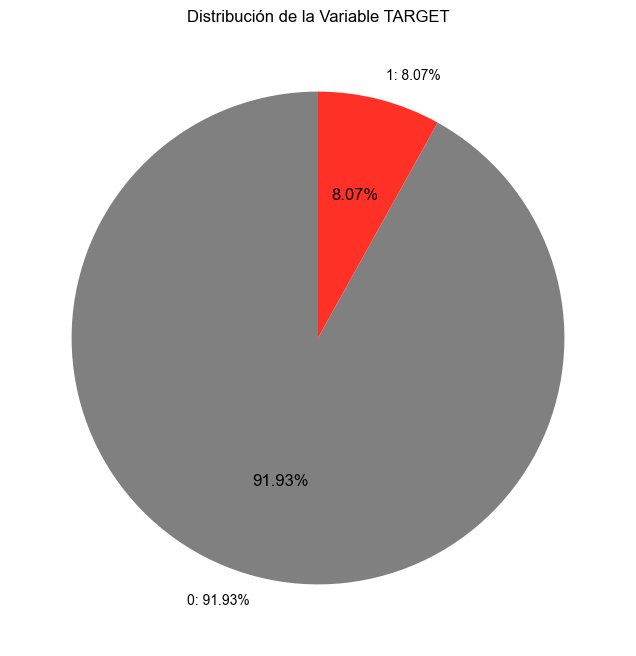

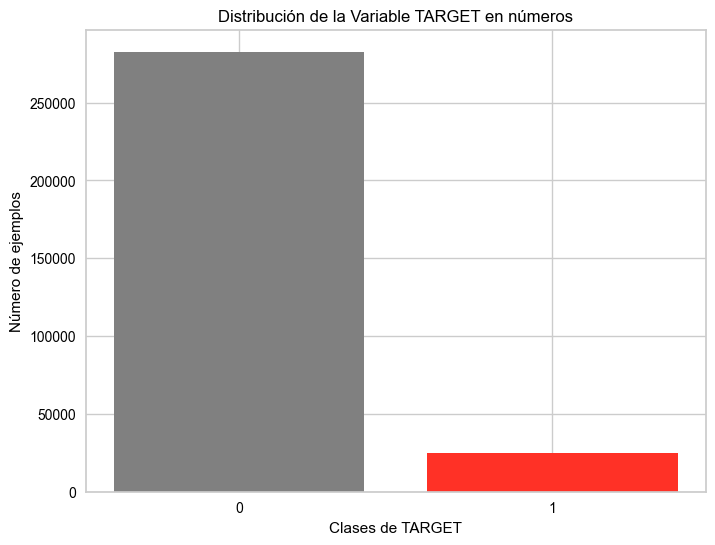

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu dataframe se llama data y la columna TARGET contiene la variable objetivo
# data = pd.read_csv('tu_archivo.csv')

# Contar la distribución de la variable TARGET
target_counts = data['TARGET'].value_counts()
target_percentages = data['TARGET'].value_counts(normalize=True) * 100

# Crear un gráfico circular con porcentajes usando los colores especificados
colors = ['#808080', '#FF3126']  # Medium Gray and Red

plt.figure(figsize=(8, 8))
plt.pie(target_percentages, labels=[f'{label}: {percentage:.2f}%' for label, percentage in zip(target_counts.index, target_percentages)],
        autopct='%1.2f%%', startangle=90, colors=colors, textprops={'color': 'black'})
plt.title('Distribución de la Variable TARGET', color='black')
plt.show()

# Crear un gráfico de barras con números usando los colores especificados
plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color=['#808080', '#FF3126'])
plt.xlabel('Clases de TARGET', color='black')
plt.ylabel('Número de ejemplos', color='black')
plt.title('Distribución de la Variable TARGET en números', color='black')
plt.xticks(target_counts.index, color='black')
plt.yticks(color='black')
plt.show()

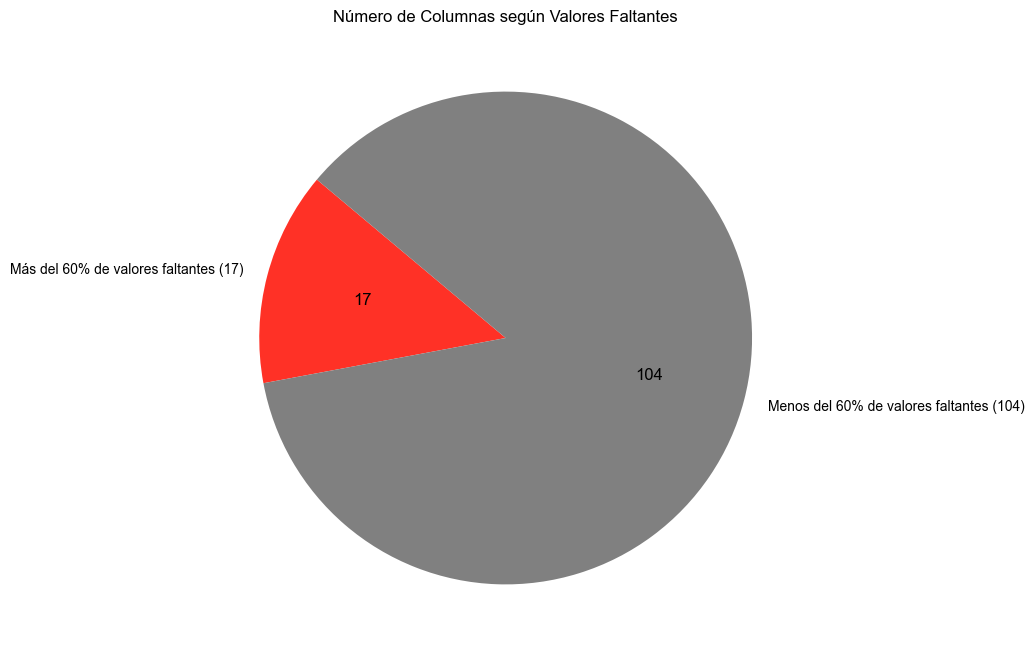

In [129]:
import matplotlib.pyplot as plt

# Supongamos que tu dataframe se llama data
# data = pd.read_csv('tu_archivo.csv')

# Calcular el porcentaje de valores nulos en cada columna
missing_percentage = data.isnull().mean() * 100

# Contar cuántas columnas tienen más del 60% de valores faltantes y cuántas tienen menos
more_than_60 = (missing_percentage > 60).sum()
less_than_60 = (missing_percentage <= 60).sum()

# Crear un gráfico circular mostrando los valores en lugar de los porcentajes
labels = [f'Más del 60% de valores faltantes ({more_than_60})', f'Menos del 60% de valores faltantes ({less_than_60})']
sizes = [more_than_60, less_than_60]
colors = ['#FF3126', '#808080']  # Red and Medium Gray

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100), startangle=140, textprops={'color': 'black'})
plt.title('Número de Columnas según Valores Faltantes', color='black')
plt.show()

Separar columnas basadas en sus tipos y calcular los missing values de cada typo

In [130]:
# Separate columns based on data types
float_columns = data.select_dtypes(include=['float64']).columns
int_columns = data.select_dtypes(include=['int64']).columns
object_columns = data.select_dtypes(include=['object']).columns

# Function to calculate and print missing values
def print_missing_values(columns, dtype):
    for column in columns:
        missing_count = data[column].isna().sum()
        print(f"Column '{column}' ({dtype}): {missing_count} missing values")

# Calculate and print missing values for each type
print_missing_values(float_columns, 'float64')
print_missing_values(int_columns, 'int64')
print_missing_values(object_columns, 'object')

Column 'AMT_INCOME_TOTAL' (float64): 0 missing values
Column 'AMT_CREDIT' (float64): 0 missing values
Column 'AMT_ANNUITY' (float64): 12 missing values
Column 'AMT_GOODS_PRICE' (float64): 278 missing values
Column 'REGION_POPULATION_RELATIVE' (float64): 0 missing values
Column 'DAYS_REGISTRATION' (float64): 0 missing values
Column 'OWN_CAR_AGE' (float64): 202929 missing values
Column 'CNT_FAM_MEMBERS' (float64): 2 missing values
Column 'EXT_SOURCE_1' (float64): 173378 missing values
Column 'EXT_SOURCE_2' (float64): 660 missing values
Column 'EXT_SOURCE_3' (float64): 60965 missing values
Column 'APARTMENTS_AVG' (float64): 156061 missing values
Column 'BASEMENTAREA_AVG' (float64): 179943 missing values
Column 'YEARS_BEGINEXPLUATATION_AVG' (float64): 150007 missing values
Column 'YEARS_BUILD_AVG' (float64): 204488 missing values
Column 'COMMONAREA_AVG' (float64): 214865 missing values
Column 'ELEVATORS_AVG' (float64): 163891 missing values
Column 'ENTRANCES_AVG' (float64): 154828 missing 

Se comprueba los valores duplicados

In [131]:
data.duplicated().any()

False

Se mira la distribución de la variable objetivo

In [132]:
data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Se comprueba la media para saber la cantidad media de impago

In [133]:
data['TARGET'].mean()

0.08072881945686496

Los siguientes bucles muestran los valores únicos de los diferentes tipos de variables: objetos, int64

In [134]:
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Unique values in CODE_GENDER: ['M' 'F' 'XNA']
Unique values in FLAG_OWN_CAR: ['N' 'Y']
Unique values in FLAG_OWN_REALTY: ['Y' 'N']
Unique values in NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Unique values in NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Unique values in NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Unique values in NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Unique values in OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Dri

In [135]:
binary_columns = data.select_dtypes(include=['int64']).columns
for col in object_columns:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Unique values in CODE_GENDER: ['M' 'F' 'XNA']
Unique values in FLAG_OWN_CAR: ['N' 'Y']
Unique values in FLAG_OWN_REALTY: ['Y' 'N']
Unique values in NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Unique values in NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Unique values in NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Unique values in NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Unique values in OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Dri

Separamos las variables en bivariable, categóricas y continuas para poder analizarlas mejor después

Variables bivariable: ['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Variables categóricas: ['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMO

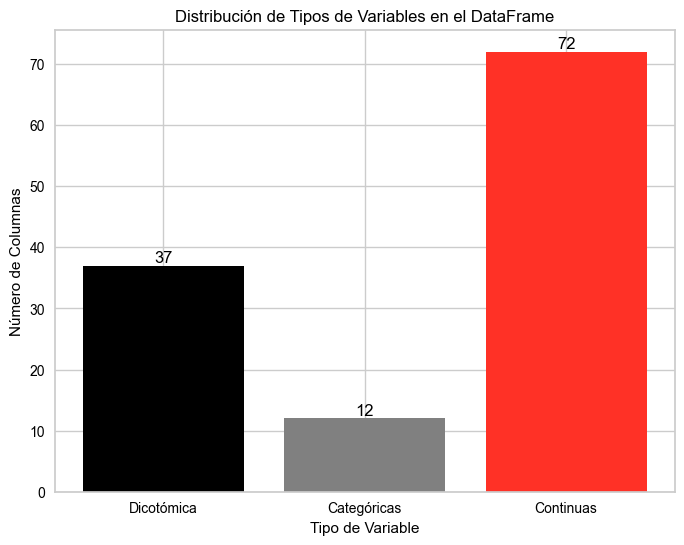

In [136]:
# Listas para almacenar nombres de las columnas
bivariable = []
categoricas = []
continuas = []

# Iterar sobre las columnas del DataFrame
for column_name, dtype in data.dtypes.items():
    # Si la columna tiene solo 2 valores únicos, es binaria
    if data[column_name].nunique() == 2:
        bivariable.append(column_name)
    # Si la columna es de tipo 'object', es categórica
    elif dtype == 'object':
        categoricas.append(column_name)
    # Si la columna es de tipo 'float64' o 'int64', es continua
    elif dtype in ['float64', 'int64']:
        continuas.append(column_name)

# Imprimir resultados
print("Variables bivariable:", bivariable)
print("Variables categóricas:", categoricas)
print("Variables continuas:", continuas)

# Contar el número de columnas para cada tipo
counts = {'Dicotómica': len(bivariable), 'Categóricas': len(categoricas), 'Continuas': len(continuas)}

# Determinar el color de las barras
colors = ['#000000', '#808080', '#808080']  # Inicialmente todas las barras son grises
max_type = max(counts, key=counts.get)  # Encuentra el tipo con mayor cantidad
color_map = {'Dicotómica': '#000000', 'Categóricas': '#808080', 'Continuas': '#FF3126'}  # Asignar colores: Negro, Gris, Rojo
colors[list(counts.keys()).index(max_type)] = color_map[max_type]  # Aplicar color rojo al máximo

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.keys(), counts.values(), color=colors)  # Asignar las barras a la variable 'bars'
plt.xlabel('Tipo de Variable', color='black')
plt.ylabel('Número de Columnas', color='black')
plt.title('Distribución de Tipos de Variables en el DataFrame', color='black')
plt.xticks(color='black')
plt.yticks(color='black')

# Añadir los números encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='black', fontsize=12)

plt.show()

Eliminamos la variable TARGET puesto que es la variable objetivo y estudiamos respecto a ella

In [137]:
bivariable.remove('TARGET')

In [138]:
# Obtener la longitud de cada lista
longitud_bivariable = len(bivariable)
longitud_categoricas = len(categoricas)
longitud_continuas = len(continuas)


# Imprimir la longitud de cada lista
print("Longitud de bivariable:", longitud_bivariable)
print("Longitud de categoricas:", longitud_categoricas)
print("Longitud de continuas:", longitud_continuas)


Longitud de bivariable: 36
Longitud de categoricas: 12
Longitud de continuas: 72


Estudiamos las variables categóricas

In [139]:
for categoria in categoricas:

    table = pd.pivot_table(data, values='TARGET', index=[categoria], aggfunc={'TARGET': [len, 'mean']}, dropna=False)
    
    # Calcular el porcentaje de distribución
    table["% Dist"] = table['len'] / data.shape[0] 
    
    # Eliminar la columna 'len' y renombrar la columna 'mean' a 'Ratio Def'
    table = table.drop(labels='len', axis=1).rename(columns={'mean': 'Ratio Def'})

    print(f"\nTabla pivotante para '{categoria}':")
    print(table)
    
    # Graficar la tabla pivotante como un gráfico de barras
    # table.plot.bar(title=f'Análisis para la variable "{categoria}"')
    # mirar los valores missing de OCCUPATION_TYPE e incluirlos


Tabla pivotante para 'CODE_GENDER':
             Ratio Def    % Dist
CODE_GENDER                     
F             0.069993  0.658344
M             0.101419  0.341643
XNA           0.000000  0.000013

Tabla pivotante para 'NAME_TYPE_SUITE':
                 Ratio Def    % Dist
NAME_TYPE_SUITE                     
Children          0.073768  0.010624
Family            0.074946  0.130561
Group of people   0.084871  0.000881
Other_A           0.087760  0.002816
Other_B           0.098305  0.005756
Spouse, partner   0.078716  0.036974
Unaccompanied     0.081830  0.808186
NaN               0.054180  0.004201

Tabla pivotante para 'NAME_INCOME_TYPE':
                      Ratio Def    % Dist
NAME_INCOME_TYPE                         
Businessman            0.000000  0.000033
Commercial associate   0.074843  0.232892
Maternity leave        0.400000  0.000016
Pensioner              0.053864  0.180033
State servant          0.057550  0.070576
Student                0.000000  0.000059
Unemploye

Estudiamos las variables bivariables

In [140]:
for binaria in bivariable:

    table = pd.pivot_table(data, values='TARGET', index=[binaria], aggfunc={'TARGET': [len, 'mean']}, dropna=False)
    
    # Calcular el porcentaje de distribución
    table["% Dist"] = table['len'] / data.shape[0]
    
    # Eliminar la columna 'len' y renombrar la columna 'mean' a 'Ratio Def'
    table = table.drop(labels='len', axis=1).rename(columns={'mean': 'Ratio Def'})

    print(f"\nTabla pivotante para '{binaria}':")
    print(table)
    
    # Graficar la tabla pivotante como un gráfico de barras
    # table.plot.bar(title=f'Análisis para la variable "{binaria}"')


Tabla pivotante para 'NAME_CONTRACT_TYPE':
                    Ratio Def    % Dist
NAME_CONTRACT_TYPE                     
Cash loans           0.083459  0.904787
Revolving loans      0.054783  0.095213

Tabla pivotante para 'FLAG_OWN_CAR':
              Ratio Def    % Dist
FLAG_OWN_CAR                     
N              0.085002  0.659892
Y              0.072437  0.340108

Tabla pivotante para 'FLAG_OWN_REALTY':
                 Ratio Def    % Dist
FLAG_OWN_REALTY                     
N                 0.083249  0.306327
Y                 0.079616  0.693673

Tabla pivotante para 'FLAG_MOBIL':
            Ratio Def    % Dist
FLAG_MOBIL                     
0            0.000000  0.000003
1            0.080729  0.999997

Tabla pivotante para 'FLAG_EMP_PHONE':
                Ratio Def    % Dist
FLAG_EMP_PHONE                     
0                0.054003  0.180111
1                0.086600  0.819889

Tabla pivotante para 'FLAG_WORK_PHONE':
                 Ratio Def    % Dist
FLAG_WO

In [141]:
for continua in continuas:
    # Calculate the exact quantiles to create 20 bins
    quantiles = np.linspace(0, 1, 21)
    bins = data[continua].quantile(quantiles).unique()
    
    # Use pd.cut to bin the data based on the calculated quantiles
    binned_data = pd.cut(data[continua], bins=bins, include_lowest=True, duplicates='drop')
    
    temp_data = data.copy()
    temp_data[f'{continua}_bin'] = binned_data
    # Create a pivot table with the binned column as the index
    table = pd.pivot_table(
        temp_data, 
        values='TARGET', 
        index=[f'{continua}_bin'], 
        aggfunc=['count', 'mean'],
        dropna=False
    )
    
    # Flatten the column index for easier handling
    table.columns = ['Count', 'Ratio Def']
    
    # Calculate the percentage distribution
    table["% Dist"] = table['Count'] / data.shape[0]
    
    # Drop the 'Count' column as it's no longer needed
    table = table.drop(columns='Count')
    
    # Print the pivot table
    print(f"\nPivot table for '{continua}':")
    print(table)


Pivot table for 'CNT_CHILDREN':
                  Ratio Def    % Dist
CNT_CHILDREN_bin                     
(-0.001, 1.0]      0.079797  0.899122
(1.0, 2.0]         0.087218  0.086986
(2.0, 19.0]        0.100421  0.013892

Pivot table for 'AMT_INCOME_TOTAL':
                         Ratio Def    % Dist
AMT_INCOME_TOTAL_bin                        
(25649.999, 67500.0]      0.078858  0.069155
(67500.0, 81000.0]        0.087258  0.039429
(81000.0, 90000.0]        0.081489  0.079773
(90000.0, 99000.0]        0.085406  0.018695
(99000.0, 112500.0]       0.087192  0.120018
(112500.0, 126000.0]      0.090032  0.037420
(126000.0, 135000.0]      0.083311  0.121433
(135000.0, 147150.0]      0.090007  0.014091
(147150.0, 157500.0]      0.087080  0.095265
(157500.0, 162000.0]      0.075616  0.005935
(162000.0, 180000.0]      0.084224  0.099847
(180000.0, 202500.0]      0.079798  0.066303
(202500.0, 225000.0]      0.076618  0.079412
(225000.0, 234000.0]      0.069556  0.003226
(234000.0, 270000.0]

Escogemos aquellas variables que  vayamos a considerar en el modelo:

In [142]:
data_to_drop = data

In [143]:
columnas_a_eliminar = list(set([
    'NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY', 'FLAG_MOBIL',
    'FLAG_CONT_MOBILE',  'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
    'FLAG_DOCUMENT_2',  'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'CNT_CHILDREN', 'AMT_GOODS_PRICE',
    'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
    'EXT_SOURCE_1', 'APARTMENTS_AVG',
    'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
    'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
    'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
    'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
    'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
    'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
    'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
]))

In [144]:
data_to_study = data_to_drop.drop(columns=columnas_a_eliminar)

In [145]:
data_to_study.to_csv('data_to_study.csv', index=False)

In [146]:
data_to_study

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,...,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,...,0.0,-828.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0,-815.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0.0,-617.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,...,0.0,-273.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,...,0.0,-1909.0,1,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.0,-322.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# Separate columns based on data types
float_columns = data_to_study.select_dtypes(include=['float64']).columns
int_columns = data_to_study.select_dtypes(include=['int64']).columns
object_columns = data_to_study.select_dtypes(include=['object']).columns

# Function to calculate and print missing values
def print_missing_values(columns, dtype):
    for column in columns:
        missing_count = data_to_study[column].isna().sum()
        print(f"Column '{column}' ({dtype}): {missing_count} missing values")

# Calculate and print missing values for each type
print_missing_values(float_columns, 'float64')
print_missing_values(int_columns, 'int64')
print_missing_values(object_columns, 'object')

Column 'AMT_INCOME_TOTAL' (float64): 0 missing values
Column 'AMT_CREDIT' (float64): 0 missing values
Column 'AMT_ANNUITY' (float64): 12 missing values
Column 'REGION_POPULATION_RELATIVE' (float64): 0 missing values
Column 'DAYS_REGISTRATION' (float64): 0 missing values
Column 'OWN_CAR_AGE' (float64): 202929 missing values
Column 'EXT_SOURCE_2' (float64): 660 missing values
Column 'EXT_SOURCE_3' (float64): 60965 missing values
Column 'LIVINGAPARTMENTS_MODE' (float64): 210199 missing values
Column 'OBS_30_CNT_SOCIAL_CIRCLE' (float64): 1021 missing values
Column 'DEF_30_CNT_SOCIAL_CIRCLE' (float64): 1021 missing values
Column 'DAYS_LAST_PHONE_CHANGE' (float64): 1 missing values
Column 'AMT_REQ_CREDIT_BUREAU_HOUR' (float64): 41519 missing values
Column 'AMT_REQ_CREDIT_BUREAU_DAY' (float64): 41519 missing values
Column 'AMT_REQ_CREDIT_BUREAU_WEEK' (float64): 41519 missing values
Column 'AMT_REQ_CREDIT_BUREAU_MON' (float64): 41519 missing values
Column 'AMT_REQ_CREDIT_BUREAU_QRT' (float64):

In [148]:
# Eliminar filas con valores nulos en la columna AMT_ANNUITY (solo tiene 12 valores)
data_to_study.dropna(subset=['AMT_ANNUITY'], inplace=True)

In [149]:
data_to_study

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,...,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,...,0.0,-828.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0,-815.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0.0,-617.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,...,0.0,-273.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,...,0.0,-1909.0,1,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.0,-322.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Valores especiales para reemplazar NaN
nan_replacement_float = -9999.0
nan_replacement_object = 'MISSING'

# Reemplazar NaN con valores especiales
for column in data_to_study.columns:
    if data_to_study[column].isna().any():  # Solo procesar columnas con NaNs
        if data_to_study[column].dtype == 'float64':
            data_to_study[column].fillna(nan_replacement_float, inplace=True)
        elif data_to_study[column].dtype == 'object':
            data_to_study[column].fillna(nan_replacement_object, inplace=True)

In [151]:
missing_values = data_to_study.isnull().sum()
missing_values

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_PHONE                    0
OCCUPATION_TYPE               0
REGION_RATING_CLIENT          0
HOUR_APPR_PROCESS_START       0
REG_CITY_NOT_LIVE_CITY        0
REG_CITY_NOT_WORK_CITY        0
LIVE_CITY_NOT_WORK_CITY       0
ORGANIZATION_TYPE             0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
LIVINGAPARTMENTS_MODE         0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENC

In [152]:
pd.set_option('display.max_columns', None)

data_to_study

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAPARTMENTS_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,-9999.0,1,0,1,Laborers,2,10,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0220,block of flats,"Stone, brick",No,2.0,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,-9999.0,1,0,1,Core staff,1,11,0,0,0,School,0.622246,-9999.000000,0.0790,block of flats,Block,No,1.0,0.0,-828.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,Laborers,2,9,0,0,0,Government,0.555912,0.729567,-9999.0000,MISSING,MISSING,MISSING,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,-9999.0,1,0,0,Laborers,2,17,0,0,0,Business Entity Type 3,0.650442,-9999.000000,-9999.0000,MISSING,MISSING,MISSING,2.0,0.0,-617.0,1,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,0,Cash loans,M,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,-9999.0,1,0,0,Core staff,2,11,0,1,1,Religion,0.322738,-9999.000000,-9999.0000,MISSING,MISSING,MISSING,0.0,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,-9999.0,1,0,0,Sales staff,1,15,0,0,0,Services,0.681632,-9999.000000,0.0882,block of flats,"Stone, brick",No,0.0,0.0,-273.0,0,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
307507,0,Cash loans,F,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,-9999.0,0,0,1,MISSING,2,8,0,0,0,XNA,0.115992,-9999.000000,0.0220,block of flats,"Stone, brick",No,0.0,0.0,0.0,1,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
307508,0,Cash loans,F,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,-9999.0,1,0,0,Managers,3,9,0,1,1,School,0.535722,0.218859,0.0918,block of flats,Panel,No,6.0,0.0,-1909.0,1,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,-9999.0,1,0,0,Laborers,2,9,1,1,0,Business Entity Type 1,0.514163,0.661024,-9999.0000,block of flats,"Stone, brick",No,0.0,0.0,-322.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
# Reemplazar valores no negativos en 'DAYS_EMPLOYED' con un valor muy alto (por ejemplo, 100 años en días)
data_to_study.loc[data_to_study['DAYS_EMPLOYED'] >= 0, 'DAYS_EMPLOYED'] = 36500

# Convert DAYS_BIRTH, DAYS_REGISTRATION, and DAYS_ID_PUBLISH to positive years
data_to_study.loc[:, 'YEARS_BIRTH'] = abs(data_to_study['DAYS_BIRTH']) / 365
data_to_study.loc[:, 'YEARS_REGISTRATION'] = abs(data_to_study['DAYS_REGISTRATION']) / 365
data_to_study.loc[:, 'YEARS_ID_PUBLISH'] = abs(data_to_study['DAYS_ID_PUBLISH']) / 365

# Drop the original columns
data_to_study.drop(columns=['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], inplace=True)

# Convert DAYS_EMPLOYED to positive years, ignoring NaN values
data_to_study.loc[:, 'YEARS_EMPLOYED'] = abs(data_to_study['DAYS_EMPLOYED']) / 365

# Drop the original DAYS_EMPLOYED column
data_to_study.drop(columns=['DAYS_EMPLOYED'], inplace=True)

# Display the updated dataframe with the new columns
print(data_to_study[['YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']].head())


# Eliminar valor XNA de CODE_GENDER
data_to_study = data_to_study[data_to_study['CODE_GENDER'] != 'XNA']

# Eliminar Businessman y Student de NAME_INCOME_TYPE
data_to_study = data_to_study[~data_to_study['NAME_INCOME_TYPE'].isin(['Businessman', 'Student'])]

# Agrupar NAME_EDUCATION_TYPE
education_mapping = {
    'Academic degree': 'Higher education',
    'Higher education': 'Higher education',
    'Incomplete higher': 'Incomplete higher',
    'Lower secondary': 'Secondary / secondary special',
    'Secondary / secondary special': 'Secondary / secondary special'
}
data_to_study['NAME_EDUCATION_TYPE'] = data_to_study['NAME_EDUCATION_TYPE'].map(education_mapping)

# Agrupar ORGANIZATION_TYPE
organization_mapping = {
    'Hotel': 'Hotel/Housing',
    'Housing': 'Hotel/Housing',
    'Kindergarten': 'Education/Academic',
    'School': 'Education/Academic',
    'University': 'Education/Academic',
    'Military': 'Security/Defense',
    'Police': 'Security/Defense',
    'Security': 'Security/Defense',
    'Security Ministries': 'Security/Defense',
    'Industry: type 1': 'Industry/Manufacturing',
    'Industry: type 2': 'Industry/Manufacturing',
    'Industry: type 3': 'Industry/Manufacturing',
    'Industry: type 4': 'Industry/Manufacturing',
    'Industry: type 5': 'Industry/Manufacturing',
    'Industry: type 6': 'Industry/Manufacturing',
    'Industry: type 7': 'Industry/Manufacturing',
    'Industry: type 8': 'Industry/Manufacturing',
    'Industry: type 9': 'Industry/Manufacturing',
    'Industry: type 10': 'Industry/Manufacturing',
    'Industry: type 11': 'Industry/Manufacturing',
    'Industry: type 12': 'Industry/Manufacturing',
    'Industry: type 13': 'Industry/Manufacturing',
    'Transport: type 1': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport',
    'Transport: type 4': 'Transport',
    'Trade: type 1': 'Trade/Commerce',
    'Trade: type 2': 'Trade/Commerce',
    'Trade: type 3': 'Trade/Commerce',
    'Trade: type 4': 'Trade/Commerce',
    'Trade: type 5': 'Trade/Commerce',
    'Trade: type 6': 'Trade/Commerce',
    'Trade: type 7': 'Trade/Commerce',
    'Medicine': 'Healthcare/Medicine',
    'Emergency': 'Healthcare/Medicine',
    'Government': 'Government/Public Services',
    'Postal': 'Government/Public Services',
    'Legal Services': 'Government/Public Services',
    'Telecom': 'Telecommunications/Technology',
    'Mobile': 'Telecommunications/Technology',
    'Bank': 'Financial Services',
    'Insurance': 'Financial Services',
    'Agriculture': 'Agriculture/Farming',
    'Restaurant': 'Service Industry',
    'Cleaning': 'Service Industry',
    'Services': 'Service Industry',
    'Advertising': 'Miscellaneous',
    'Culture': 'Miscellaneous',
    'Religion': 'Miscellaneous',
    'Other': 'Miscellaneous'
}
data_to_study['ORGANIZATION_TYPE'] = data_to_study['ORGANIZATION_TYPE'].replace(organization_mapping)

# Agrupar OCCUPATION_TYPE

occupation_mapping = {
    'Managers': 'Management/Administration',
    'Accountants': 'Management/Administration',
    'HR staff': 'Management/Administration',
    'Secretaries': 'Management/Administration',
    'Core staff': 'Management/Administration',
    'High skill tech staff': 'Technical/IT',
    'IT staff': 'Technical/IT',
    'Laborers': 'Labor',
    'Low-skill Laborers': 'Labor',
    'Cleaning staff': 'Service Staff',
    'Cooking staff': 'Service Staff',
    'Private service staff': 'Service Staff',
    'Waiters/barmen staff': 'Service Staff',
    'Security staff': 'Service Staff',
    'Medicine staff': 'Medical/Healthcare',
    'Realty agents': 'Sales/Realty',
    'Sales staff': 'Sales/Realty',
    'Drivers': 'Transport'
}
data_to_study['OCCUPATION_TYPE'] = data_to_study['OCCUPATION_TYPE'].replace(organization_mapping)

# Agrupar columnas continuas en intervalos
# AMT_INCOME_TOTAL
income_bins = [25649.999, 99000, 180000, 117000000]
income_labels = [0, 1, 2]
data_to_study['AMT_INCOME_TOTAL_GROUP'] = pd.cut(data_to_study['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels, include_lowest=True)
data_to_study.drop(columns=['AMT_INCOME_TOTAL'], inplace=True)
# AMT_CREDIT
credit_bins = [44999, 270000, 675000, 4050000]
credit_labels = [0, 1, 2]
data_to_study['AMT_CREDIT_GROUP'] = pd.cut(data_to_study['AMT_CREDIT'], bins=credit_bins, labels=credit_labels, include_lowest=True)
data_to_study.drop(columns=['AMT_CREDIT'], inplace=True)
# AMT_ANNUITY
annuity_bins = [1615, 18189, 37516.5, 258025.5]
annuity_labels = [0, 1, 2]
data_to_study['AMT_ANNUITY_GROUP'] = pd.cut(data_to_study['AMT_ANNUITY'], bins=annuity_bins, labels=annuity_labels, include_lowest=True)
data_to_study.dropna(subset=['AMT_ANNUITY_GROUP'], inplace=True) 
data_to_study.drop(columns=['AMT_ANNUITY'], inplace=True)

# REGION_POPULATION_RELATIVE
region_bins = [-0.00071, 0.0313, 0.0725]
region_labels = [0, 1]
data_to_study['REGION_POPULATION_RELATIVE_GROUP'] = pd.cut(data_to_study['REGION_POPULATION_RELATIVE'], bins=region_bins, labels=region_labels, include_lowest=True)
data_to_study['REGION_POPULATION_RELATIVE_GROUP'] = data_to_study['REGION_POPULATION_RELATIVE_GROUP'].cat.add_categories(['2']).fillna('2')
data_to_study.drop(columns=['REGION_POPULATION_RELATIVE'], inplace=True)

# Convert 'Unknown' to NaN in OWN_CAR_AGE before converting to float
##data_to_study['OWN_CAR_AGE'] = data_to_study['OWN_CAR_AGE'].replace('Unknown', pd.NA)
##data_to_study['OWN_CAR_AGE'] = pd.to_numeric(data_to_study['OWN_CAR_AGE'], errors='coerce')

# Group OWN_CAR_AGE into intervals
car_age_bins = [-0.001, 12.0, 91.0]
car_age_labels = [0, 1]
data_to_study['OWN_CAR_AGE_GROUP'] = pd.cut(data_to_study['OWN_CAR_AGE'], bins=car_age_bins, labels=car_age_labels, include_lowest=True)
data_to_study['OWN_CAR_AGE_GROUP'] = data_to_study['OWN_CAR_AGE_GROUP'].cat.add_categories(['2']).fillna('2')
data_to_study.drop(columns=['OWN_CAR_AGE'], inplace=True)

# HOUR_APPR_PROCESS_START
hour_bins = [-0.001, 8.0, 14.0, 23.0]
hour_labels = [0, 1, 2]
data_to_study['HOUR_APPR_PROCESS_START_GROUP'] = pd.cut(data_to_study['HOUR_APPR_PROCESS_START'], bins=hour_bins, labels=hour_labels, include_lowest=True)
data_to_study.drop(columns=['HOUR_APPR_PROCESS_START'], inplace=True)



   YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH
0    25.920548        1.745205            9.994521          5.808219
1    45.931507        3.254795            3.249315          0.797260
2    52.180822        0.616438           11.671233          6.934247
3    52.068493        8.326027           26.939726          6.676712
4    54.608219        8.323288           11.810959          9.473973


In [154]:
data_to_study

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAPARTMENTS_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_EMPLOYED,AMT_INCOME_TOTAL_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP,REGION_POPULATION_RELATIVE_GROUP,OWN_CAR_AGE_GROUP,HOUR_APPR_PROCESS_START_GROUP
0,1,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,1,Laborers,2,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0220,block of flats,"Stone, brick",No,2.0,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,9.994521,5.808219,1.745205,2,1,1,0,2,1
1,0,Cash loans,F,State servant,Higher education,Married,House / apartment,1,0,1,Core staff,1,0,0,0,Education/Academic,0.622246,-9999.000000,0.0790,block of flats,Block,No,1.0,0.0,-828.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.249315,0.797260,3.254795,2,2,1,0,2,1
2,0,Revolving loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,Laborers,2,0,0,0,Government/Public Services,0.555912,0.729567,-9999.0000,MISSING,MISSING,MISSING,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,11.671233,6.934247,0.616438,0,0,0,0,1,1
3,0,Cash loans,F,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,Laborers,2,0,0,0,Business Entity Type 3,0.650442,-9999.000000,-9999.0000,MISSING,MISSING,MISSING,2.0,0.0,-617.0,1,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,52.068493,26.939726,6.676712,8.326027,1,1,1,0,2,2
4,0,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,Core staff,2,0,1,1,Miscellaneous,0.322738,-9999.000000,-9999.0000,MISSING,MISSING,MISSING,0.0,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,11.810959,9.473973,8.323288,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,Working,Secondary / secondary special,Separated,With parents,1,0,0,Sales staff,1,0,0,0,Service Industry,0.681632,-9999.000000,0.0882,block of flats,"Stone, brick",No,0.0,0.0,-273.0,0,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,25.553425,23.167123,5.430137,0.646575,1,0,1,1,2,2
307507,0,Cash loans,F,Pensioner,Secondary / secondary special,Widow,House / apartment,0,0,1,MISSING,2,0,0,0,XNA,0.115992,-9999.000000,0.0220,block of flats,"Stone, brick",No,0.0,0.0,0.0,1,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,56.917808,12.021918,11.205479,100.000000,0,0,0,0,2,0
307508,0,Cash loans,F,Working,Higher education,Separated,House / apartment,1,0,0,Managers,3,0,1,1,Education/Academic,0.535722,0.218859,0.0918,block of flats,Panel,No,6.0,0.0,-1909.0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,41.002740,18.457534,14.109589,21.701370,1,2,1,0,2,1
307509,1,Cash loans,F,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,Laborers,2,1,1,0,Business Entity Type 1,0.514163,0.661024,-9999.0000,block of flats,"Stone, brick",No,0.0,0.0,-322.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,32.769863,7.019178,2.550685,13.112329,1,1,1,0,2,1


In [155]:
# Agrupar las variables de años en intervalos de 5 años
year_columns = ['YEARS_BIRTH', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_EMPLOYED']

for year_column in year_columns:
    # Filtrar valores no numéricos
    data_to_study[year_column] = pd.to_numeric(data_to_study[year_column], errors='coerce')
    
    # Crear bins de 5 en 5 años
    bins = np.arange(0, data_to_study[year_column].dropna().max() + 5, 5)
    
    # Usar pd.cut para agrupar los datos en los bins creados
    binned_data = pd.cut(data_to_study[year_column], bins=bins, include_lowest=True, duplicates='drop')
    
    temp_data = data_to_study.copy()
    temp_data[f'{year_column}_bin'] = binned_data
    
    # Crear una tabla dinámica con la columna binned como índice
    table = pd.pivot_table(
        temp_data, 
        values='TARGET', 
        index=[f'{year_column}_bin'], 
        aggfunc=['count', 'mean'],
        dropna=False
    )
    
    # Aplanar el índice de columnas para un manejo más fácil
    table.columns = ['Count', 'Ratio Def']
    
    # Calcular la distribución porcentual
    table["% Dist"] = table['Count'] / data_to_study.shape[0]
    
    # Eliminar la columna 'Count' ya que no es necesaria
    table = table.drop(columns='Count')

     # Calcular la media 
    interval_means = temp_data.groupby(f'{year_column}_bin')[year_column].mean()
    
    # Reemplazar los índices de intervalos con el promedio calculado
    new_index = []
    for intv in table.index:
        try:
            mean_val = interval_means[intv]
            new_index.append(f'{mean_val:.2f}')
        except KeyError:
            new_index.append('NaN')
    
    table.index = new_index
    # Imprimir la tabla dinámica
    print(f"\nPivot table for '{year_column}':")
    print(table)


    # Generate new columns for each bin
    for i in range(len(bins) - 1):
        # Create a label for the bin
        bin_label = f'{bins[i]}_{bins[i+1]}'
        col_name = f'{year_column}_{bin_label}'
        
        # Check if any values fall within this bin
        mask = (data_to_study[year_column] >= bins[i]) & (data_to_study[year_column] < bins[i+1])
        
        # Check if there are any non-NaN values within this bin range
        if data_to_study.loc[mask, year_column].notna().any():
            # Only create the column if there are non-NaN values in this range
            data_to_study[col_name] = np.where(mask, 1, 0)

# Display the first few rows of the updated dataframe
data_to_study.head()


Pivot table for 'YEARS_BIRTH':
       Ratio Def    % Dist
nan          NaN  0.000000
nan          NaN  0.000000
nan          NaN  0.000000
nan          NaN  0.000000
23.38   0.123077  0.039533
27.82   0.111456  0.106860
32.48   0.102838  0.128245
37.56   0.089420  0.139413
42.46   0.078502  0.134649
47.46   0.074177  0.114263
52.59   0.066987  0.113612
57.49   0.055319  0.107709
62.41   0.052737  0.089362
66.56   0.037270  0.026354

Pivot table for 'YEARS_REGISTRATION':
       Ratio Def    % Dist
2.29    0.091817  0.232831
7.52    0.087203  0.177606
12.48   0.086822  0.190860
17.46   0.078078  0.136463
22.46   0.071004  0.118683
27.20   0.059018  0.081615
32.30   0.058463  0.038720
36.98   0.052505  0.017592
41.89   0.037857  0.004553
46.86   0.039841  0.000816
51.93   0.060000  0.000163
56.99   0.000000  0.000068
62.17   0.142857  0.000023
66.32   0.000000  0.000007

Pivot table for 'YEARS_ID_PUBLISH':
       Ratio Def    % Dist
2.55    0.098719  0.266071
7.54    0.084572  0.301424
1

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAPARTMENTS_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_EMPLOYED,AMT_INCOME_TOTAL_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP,REGION_POPULATION_RELATIVE_GROUP,OWN_CAR_AGE_GROUP,HOUR_APPR_PROCESS_START_GROUP,YEARS_BIRTH_20.0_25.0,YEARS_BIRTH_25.0_30.0,YEARS_BIRTH_30.0_35.0,YEARS_BIRTH_35.0_40.0,YEARS_BIRTH_40.0_45.0,YEARS_BIRTH_45.0_50.0,YEARS_BIRTH_50.0_55.0,YEARS_BIRTH_55.0_60.0,YEARS_BIRTH_60.0_65.0,YEARS_BIRTH_65.0_70.0,YEARS_REGISTRATION_0.0_5.0,YEARS_REGISTRATION_5.0_10.0,YEARS_REGISTRATION_10.0_15.0,YEARS_REGISTRATION_15.0_20.0,YEARS_REGISTRATION_20.0_25.0,YEARS_REGISTRATION_25.0_30.0,YEARS_REGISTRATION_30.0_35.0,YEARS_REGISTRATION_35.0_40.0,YEARS_REGISTRATION_40.0_45.0,YEARS_REGISTRATION_45.0_50.0,YEARS_REGISTRATION_50.0_55.0,YEARS_REGISTRATION_55.0_60.0,YEARS_REGISTRATION_60.0_65.0,YEARS_REGISTRATION_65.0_70.0,YEARS_ID_PUBLISH_0.0_5.0,YEARS_ID_PUBLISH_5.0_10.0,YEARS_ID_PUBLISH_10.0_15.0,YEARS_ID_PUBLISH_15.0_20.0,YEARS_EMPLOYED_0.0_5.0,YEARS_EMPLOYED_5.0_10.0,YEARS_EMPLOYED_10.0_15.0,YEARS_EMPLOYED_15.0_20.0,YEARS_EMPLOYED_20.0_25.0,YEARS_EMPLOYED_25.0_30.0,YEARS_EMPLOYED_30.0_35.0,YEARS_EMPLOYED_35.0_40.0,YEARS_EMPLOYED_40.0_45.0,YEARS_EMPLOYED_45.0_50.0
0,1,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,1,Laborers,2,0,0,0,Business Entity Type 3,0.262949,0.139376,0.022,block of flats,"Stone, brick",No,2.0,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,9.994521,5.808219,1.745205,2,1,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,State servant,Higher education,Married,House / apartment,1,0,1,Core staff,1,0,0,0,Education/Academic,0.622246,-9999.000000,0.079,block of flats,Block,No,1.0,0.0,-828.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.249315,0.797260,3.254795,2,2,1,0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,Laborers,2,0,0,0,Government/Public Services,0.555912,0.729567,-9999.000,MISSING,MISSING,MISSING,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,11.671233,6.934247,0.616438,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,Laborers,2,0,0,0,Business Entity Type 3,0.650442,-9999.000000,-9999.000,MISSING,MISSING,MISSING,2.0,0.0,-617.0,1,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,52.068493,26.939726,6.676712,8.326027,1,1,1,0,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,Core staff,2,0,1,1,Miscellaneous,0.322738,-9999.000000,-9999.000,MISSING,MISSING,MISSING,0.0,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,11.810959,9.473973,8.323288,1,1,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [156]:
data_to_study

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAPARTMENTS_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_EMPLOYED,AMT_INCOME_TOTAL_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP,REGION_POPULATION_RELATIVE_GROUP,OWN_CAR_AGE_GROUP,HOUR_APPR_PROCESS_START_GROUP,YEARS_BIRTH_20.0_25.0,YEARS_BIRTH_25.0_30.0,YEARS_BIRTH_30.0_35.0,YEARS_BIRTH_35.0_40.0,YEARS_BIRTH_40.0_45.0,YEARS_BIRTH_45.0_50.0,YEARS_BIRTH_50.0_55.0,YEARS_BIRTH_55.0_60.0,YEARS_BIRTH_60.0_65.0,YEARS_BIRTH_65.0_70.0,YEARS_REGISTRATION_0.0_5.0,YEARS_REGISTRATION_5.0_10.0,YEARS_REGISTRATION_10.0_15.0,YEARS_REGISTRATION_15.0_20.0,YEARS_REGISTRATION_20.0_25.0,YEARS_REGISTRATION_25.0_30.0,YEARS_REGISTRATION_30.0_35.0,YEARS_REGISTRATION_35.0_40.0,YEARS_REGISTRATION_40.0_45.0,YEARS_REGISTRATION_45.0_50.0,YEARS_REGISTRATION_50.0_55.0,YEARS_REGISTRATION_55.0_60.0,YEARS_REGISTRATION_60.0_65.0,YEARS_REGISTRATION_65.0_70.0,YEARS_ID_PUBLISH_0.0_5.0,YEARS_ID_PUBLISH_5.0_10.0,YEARS_ID_PUBLISH_10.0_15.0,YEARS_ID_PUBLISH_15.0_20.0,YEARS_EMPLOYED_0.0_5.0,YEARS_EMPLOYED_5.0_10.0,YEARS_EMPLOYED_10.0_15.0,YEARS_EMPLOYED_15.0_20.0,YEARS_EMPLOYED_20.0_25.0,YEARS_EMPLOYED_25.0_30.0,YEARS_EMPLOYED_30.0_35.0,YEARS_EMPLOYED_35.0_40.0,YEARS_EMPLOYED_40.0_45.0,YEARS_EMPLOYED_45.0_50.0
0,1,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,1,Laborers,2,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0220,block of flats,"Stone, brick",No,2.0,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,9.994521,5.808219,1.745205,2,1,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,State servant,Higher education,Married,House / apartment,1,0,1,Core staff,1,0,0,0,Education/Academic,0.622246,-9999.000000,0.0790,block of flats,Block,No,1.0,0.0,-828.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.249315,0.797260,3.254795,2,2,1,0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,Laborers,2,0,0,0,Government/Public Services,0.555912,0.729567,-9999.0000,MISSING,MISSING,MISSING,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,11.671233,6.934247,0.616438,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,Laborers,2,0,0,0,Business Entity Type 3,0.650442,-9999.000000,-9999.0000,MISSING,MISSING,MISSING,2.0,0.0,-617.0,1,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,52.068493,26.939726,6.676712,8.326027,1,1,1,0,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,Core staff,2,0,1,1,Miscellaneous,0.322738,-9999.000000,-9999.0000,MISSING,MISSING,MISSING,0.0,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,11.810959,9.473973,8.323288,1,1,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,Workin

In [157]:
print(data_to_study.dtypes)

TARGET                       int64
NAME_CONTRACT_TYPE          object
CODE_GENDER                 object
NAME_INCOME_TYPE            object
NAME_EDUCATION_TYPE         object
                             ...  
YEARS_EMPLOYED_25.0_30.0     int32
YEARS_EMPLOYED_30.0_35.0     int32
YEARS_EMPLOYED_35.0_40.0     int32
YEARS_EMPLOYED_40.0_45.0     int32
YEARS_EMPLOYED_45.0_50.0     int32
Length: 81, dtype: object


In [158]:
# Convert specified columns to int64
columns_to_convert = [
    'AMT_INCOME_TOTAL_GROUP',
    'AMT_CREDIT_GROUP',
    'AMT_ANNUITY_GROUP',
    'REGION_POPULATION_RELATIVE_GROUP',
    'OWN_CAR_AGE_GROUP',
    'HOUR_APPR_PROCESS_START_GROUP'
]

for column in columns_to_convert:
    data_to_study[column] = data_to_study[column].astype('int64')

# Verify the conversion
data_to_study[columns_to_convert].dtypes

AMT_INCOME_TOTAL_GROUP              int64
AMT_CREDIT_GROUP                    int64
AMT_ANNUITY_GROUP                   int64
REGION_POPULATION_RELATIVE_GROUP    int64
OWN_CAR_AGE_GROUP                   int64
HOUR_APPR_PROCESS_START_GROUP       int64
dtype: object

In [159]:
data_to_study.to_csv('data_before_pycaret.csv', index=False)

In [160]:
object_columns = data_to_study.select_dtypes(include=['object']).columns
for col in object_columns:
    unique_values = data_to_study[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Unique values in CODE_GENDER: ['M' 'F']
Unique values in NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Maternity leave']
Unique values in NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher']
Unique values in NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Unique values in NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Unique values in OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'MISSING' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Unique values in ORGANIZATION_TYPE: ['Busin

In [161]:
data_to_study

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,LIVINGAPARTMENTS_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_EMPLOYED,AMT_INCOME_TOTAL_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP,REGION_POPULATION_RELATIVE_GROUP,OWN_CAR_AGE_GROUP,HOUR_APPR_PROCESS_START_GROUP,YEARS_BIRTH_20.0_25.0,YEARS_BIRTH_25.0_30.0,YEARS_BIRTH_30.0_35.0,YEARS_BIRTH_35.0_40.0,YEARS_BIRTH_40.0_45.0,YEARS_BIRTH_45.0_50.0,YEARS_BIRTH_50.0_55.0,YEARS_BIRTH_55.0_60.0,YEARS_BIRTH_60.0_65.0,YEARS_BIRTH_65.0_70.0,YEARS_REGISTRATION_0.0_5.0,YEARS_REGISTRATION_5.0_10.0,YEARS_REGISTRATION_10.0_15.0,YEARS_REGISTRATION_15.0_20.0,YEARS_REGISTRATION_20.0_25.0,YEARS_REGISTRATION_25.0_30.0,YEARS_REGISTRATION_30.0_35.0,YEARS_REGISTRATION_35.0_40.0,YEARS_REGISTRATION_40.0_45.0,YEARS_REGISTRATION_45.0_50.0,YEARS_REGISTRATION_50.0_55.0,YEARS_REGISTRATION_55.0_60.0,YEARS_REGISTRATION_60.0_65.0,YEARS_REGISTRATION_65.0_70.0,YEARS_ID_PUBLISH_0.0_5.0,YEARS_ID_PUBLISH_5.0_10.0,YEARS_ID_PUBLISH_10.0_15.0,YEARS_ID_PUBLISH_15.0_20.0,YEARS_EMPLOYED_0.0_5.0,YEARS_EMPLOYED_5.0_10.0,YEARS_EMPLOYED_10.0_15.0,YEARS_EMPLOYED_15.0_20.0,YEARS_EMPLOYED_20.0_25.0,YEARS_EMPLOYED_25.0_30.0,YEARS_EMPLOYED_30.0_35.0,YEARS_EMPLOYED_35.0_40.0,YEARS_EMPLOYED_40.0_45.0,YEARS_EMPLOYED_45.0_50.0
0,1,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,1,Laborers,2,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0220,block of flats,"Stone, brick",No,2.0,2.0,-1134.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,9.994521,5.808219,1.745205,2,1,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,State servant,Higher education,Married,House / apartment,1,0,1,Core staff,1,0,0,0,Education/Academic,0.622246,-9999.000000,0.0790,block of flats,Block,No,1.0,0.0,-828.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.249315,0.797260,3.254795,2,2,1,0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,Laborers,2,0,0,0,Government/Public Services,0.555912,0.729567,-9999.0000,MISSING,MISSING,MISSING,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,11.671233,6.934247,0.616438,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,Laborers,2,0,0,0,Business Entity Type 3,0.650442,-9999.000000,-9999.0000,MISSING,MISSING,MISSING,2.0,0.0,-617.0,1,0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,52.068493,26.939726,6.676712,8.326027,1,1,1,0,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,Core staff,2,0,1,1,Miscellaneous,0.322738,-9999.000000,-9999.0000,MISSING,MISSING,MISSING,0.0,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,11.810959,9.473973,8.323288,1,1,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,Workin

In [162]:
correlation_matrix = data_to_study[['AMT_REQ_CREDIT_BUREAU_HOUR', 
                         'AMT_REQ_CREDIT_BUREAU_DAY',
                         'AMT_REQ_CREDIT_BUREAU_WEEK', 
                         'AMT_REQ_CREDIT_BUREAU_MON',
                         'AMT_REQ_CREDIT_BUREAU_QRT', 
                         'AMT_REQ_CREDIT_BUREAU_YEAR']].corr()

In [163]:
correlation_matrix

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_REQ_CREDIT_BUREAU_HOUR,1.0,1.0,1.0,1.0,1.0,1.0
AMT_REQ_CREDIT_BUREAU_DAY,1.0,1.0,1.0,1.0,1.0,1.0
AMT_REQ_CREDIT_BUREAU_WEEK,1.0,1.0,1.0,1.0,1.0,1.0
AMT_REQ_CREDIT_BUREAU_MON,1.0,1.0,1.0,1.0,1.0,1.0
AMT_REQ_CREDIT_BUREAU_QRT,1.0,1.0,1.0,1.0,1.0,1.0
AMT_REQ_CREDIT_BUREAU_YEAR,1.0,1.0,1.0,1.0,1.0,1.0


In [164]:
data_to_study = data_to_study.drop(columns=[
    'AMT_REQ_CREDIT_BUREAU_HOUR', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 
    'AMT_REQ_CREDIT_BUREAU_YEAR'
])

ELIMINACIÓN DE TRAMOS

In [165]:
data_to_study = data_to_study.loc[~data_to_study['NAME_INCOME_TYPE'].isin(['Maternity leave', 'Unemployed'])]

In [166]:
data_to_study = data_to_study.loc[~data_to_study['OCCUPATION_TYPE'].isin(['Low-skill Laborers'])]

In [167]:
data_to_study = data_to_study.loc[~data_to_study['YEARS_REGISTRATION_60.0_65.0'].isin(['1'])]

In [168]:
data_to_study = data_to_study.loc[~data_to_study['NAME_HOUSING_TYPE'].isin(['Rented apartment'])]

In [169]:
data_to_study = data_to_study.loc[~data_to_study['YEARS_BIRTH_20.0_25.0'].isin(['1'])]

In [170]:
data_to_study = data_to_study.loc[~data_to_study['NAME_HOUSING_TYPE'].isin(['With parents'])]

In [171]:
data_to_study = data_to_study.loc[~data_to_study['ORGANIZATION_TYPE'].isin(['Construction'])]

In [172]:
all_columns = data_to_study.columns.tolist()

for column in all_columns:
    if data_to_study[column].dtype == 'object' or data_to_study[column].nunique() < 100:  # Filter for categorical or low-cardinality variables
        try:
            table = pd.pivot_table(
                data_to_study,
                values='TARGET',
                index=[column],
                aggfunc={'TARGET': [len, 'mean']},
                dropna=False
            )
            
            table["% Dist"] = table['len'] / data_to_study.shape[0]
            table = table.drop(labels='len', axis=1).rename(columns={'mean': 'Ratio Def'})
            
            print(f"\nTabla pivotante para '{column}':")
            print(table)
        except Exception as e:
            print(f"Could not create pivot table for '{column}': {e}")




Could not create pivot table for 'TARGET': Grouper for 'TARGET' not 1-dimensional

Tabla pivotante para 'NAME_CONTRACT_TYPE':
                    Ratio Def    % Dist
NAME_CONTRACT_TYPE                     
Cash loans           0.079370  0.906743
Revolving loans      0.051435  0.093257

Tabla pivotante para 'CODE_GENDER':
             Ratio Def    % Dist
CODE_GENDER                     
F             0.067596  0.677148
M             0.095997  0.322852

Tabla pivotante para 'NAME_INCOME_TYPE':
                      Ratio Def    % Dist
NAME_INCOME_TYPE                         
Commercial associate   0.071221  0.228498
Pensioner              0.053839  0.196379
State servant          0.055435  0.072215
Working                0.091300  0.502908

Tabla pivotante para 'NAME_EDUCATION_TYPE':
                               Ratio Def    % Dist
NAME_EDUCATION_TYPE                               
Higher education                0.051630  0.244311
Incomplete higher               0.080377  0.030728
Se

In [173]:
from pycaret.classification import *

In [174]:

clf4_1 = setup(data=data_to_study, 
            target='TARGET', 
            fix_imbalance=True,
            fix_imbalance_method="randomundersampler",
            )

# Compare only specific models and get the best one
best_model = compare_models(include=['lightgbm', 'rf', 'gbc'])

# Tune the best model
tuned_model = tune_model(best_model, 
                         optimize='AUC', 
                         custom_grid={'n_estimators': [50, 100, 200],
                                      'learning_rate': [0.01, 0.1, 0.3],
                                      'max_depth': [3, 5, 7]})


,Description,Value
0,Session id,4008
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(279775, 76)"
4,Transformed data shape,"(114001, 137)"
5,Transformed train set shape,"(30068, 137)"
6,Transformed test set shape,"(83933, 137)"
7,Numeric features,64
8,Categorical features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6800,0.7380,0.6715,0.1489,0.2437,0.1350,0.1971,2.8830
gbc,Gradient Boosting Classifier,0.6749,0.7399,0.6793,0.1479,0.2429,0.1337,0.1972,3.7020
rf,Random Forest Classifier,0.6733,0.7195,0.6482,0.1424,0.2335,0.1232,0.1807,3.2030


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6766,0.7433,0.6769,0.1483,0.2432,0.1342,0.1972
1,0.6772,0.7450,0.6855,0.1498,0.2459,0.1372,0.2019
2,0.6730,0.7310,0.6680,0.1453,0.2387,0.1289,0.1902
3,0.6801,0.7449,0.6693,0.1485,0.2431,0.1344,0.1961
4,0.6811,0.7439,0.6906,0.1522,0.2495,0.1415,0.2073
5,0.6672,0.7338,0.6806,0.1449,0.2389,0.1286,0.1922
6,0.6637,0.7279,0.6600,0.1404,0.2315,0.1201,0.1796
7,0.6727,0.7367,0.6713,0.1457,0.2395,0.1297,0.1916
8,0.6678,0.7290,0.6735,0.1441,0.2375,0.1270,0.1892


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [175]:
ensemble_model = ensemble_model(best_model, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6820,0.7439,0.6735,0.1501,0.2455,0.1371,0.1996
1,0.6797,0.7447,0.6822,0.1504,0.2465,0.1380,0.2021
2,0.6785,0.7331,0.6700,0.1479,0.2423,0.1334,0.1952
3,0.6834,0.7494,0.6840,0.1522,0.2490,0.1412,0.2057
4,0.6797,0.7468,0.6853,0.1508,0.2472,0.1389,0.2036
5,0.6832,0.7406,0.6753,0.1508,0.2465,0.1384,0.2013
6,0.6739,0.7321,0.6554,0.1437,0.2358,0.1257,0.1846
7,0.6809,0.7398,0.6713,0.1492,0.2441,0.1355,0.1976
8,0.6744,0.7325,0.6702,0.1463,0.2402,0.1306,0.1923


In [176]:
evaluate_model(best_model)
evaluate_model(tuned_model)
evaluate_model(ensemble_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [118]:
clf_normalized = setup(data=data_to_study, 
                       target='TARGET', 
                       fix_imbalance=True, 
                       fix_imbalance_method='randomundersampler',
                       normalize=True)

# Compare only specific models and get the best one
best_modeln = compare_models(include=['lightgbm', 'rf', 'gbc'])

# Tune the best model
tuned_model = tune_model(best_modeln, 
                         optimize='AUC', 
                         custom_grid={'n_estimators': [50, 100, 200],
                                      'learning_rate': [0.01, 0.1, 0.3],
                                      'max_depth': [3, 5, 7]})



,Description,Value
0,Session id,3769
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(279775, 76)"
4,Transformed data shape,"(114001, 137)"
5,Transformed train set shape,"(30068, 137)"
6,Transformed test set shape,"(83933, 137)"
7,Numeric features,64
8,Categorical features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6785,0.7371,0.6711,0.1482,0.2427,0.1338,0.1958,2.8000
gbc,Gradient Boosting Classifier,0.6775,0.7394,0.6778,0.1487,0.2439,0.1350,0.1983,3.9210
rf,Random Forest Classifier,0.6719,0.7177,0.6485,0.1419,0.2328,0.1223,0.1798,3.1940


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6679,0.7366,0.6862,0.1461,0.2409,0.1308,0.1955
1,0.6689,0.7378,0.6828,0.1460,0.2406,0.1306,0.1946
2,0.6777,0.7397,0.6680,0.1473,0.2413,0.1322,0.1936
3,0.6671,0.7295,0.6727,0.1436,0.2367,0.1262,0.1882
4,0.6696,0.7267,0.6620,0.1430,0.2352,0.1247,0.1848
5,0.6600,0.7239,0.6747,0.1411,0.2335,0.1220,0.1842
6,0.6638,0.7397,0.7006,0.1465,0.2423,0.1321,0.1995
7,0.6662,0.7379,0.6813,0.1446,0.2386,0.1282,0.1918
8,0.6668,0.7324,0.6775,0.1444,0.2380,0.1275,0.1905


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [78]:
from imblearn.combine import SMOTETomek
clf4_2 = setup(data=data_to_study, 
            target='TARGET', 
            fix_imbalance=True,
            fix_imbalance_method="SMOTETomek",
            )

best2 = compare_models()

,Description,Value
0,Session id,6599
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(279775, 76)"
4,Transformed data shape,"(443329, 137)"
5,Transformed train set shape,"(359352, 137)"
6,Transformed test set shape,"(83933, 137)"
7,Numeric features,64
8,Categorical features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9233,0.7423,0.0073,0.5335,0.0143,0.0123,0.0551,108.3530
rf,Random Forest Classifier,0.9232,0.6930,0.0003,0.2833,0.0005,0.0004,0.0073,127.8360
gbc,Gradient Boosting Classifier,0.9232,0.7186,0.0031,0.4340,0.0061,0.0051,0.0312,156.2080
dummy,Dummy Classifier,0.9232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,105.3960
et,Extra Trees Classifier,0.9231,0.6499,0.0011,0.2662,0.0021,0.0015,0.0120,134.0850
xgboost,Extreme Gradient Boosting,0.9227,0.7321,0.0162,0.4112,0.0312,0.0256,0.0691,108.1860
ada,Ada Boost Classifier,0.9165,0.6846,0.0319,0.2163,0.0539,0.0351,0.0534,120.4080
dt,Decision Tree Classifier,0.8522,0.5309,0.1514,0.1232,0.1359,0.0560,0.0563,109.3550
knn,K Neighbors Classifier,0.6421,0.5388,0.3946,0.0886,0.1447,0.0222,0.0321,118.2520
lda,Linear Discriminant Analysis,0.6264,0.6679,0.6183,0.1212,0.2026,0.0852,0.1339,111.1000


In [79]:
clf4_3 = setup(data=data_to_study, 
            target='TARGET', 
            fix_imbalance=True,
            fix_imbalance_method="randomoversampler",
            )

best3 = compare_models()

,Description,Value
0,Session id,2640
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(279775, 76)"
4,Transformed data shape,"(445549, 137)"
5,Transformed train set shape,"(361616, 137)"
6,Transformed test set shape,"(83933, 137)"
7,Numeric features,64
8,Categorical features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9232,0.6530,0.0012,0.3992,0.0024,0.0019,0.0182,29.2820
dummy,Dummy Classifier,0.9232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.9620
rf,Random Forest Classifier,0.9231,0.7090,0.0051,0.4328,0.0100,0.0083,0.0397,20.5250
dt,Decision Tree Classifier,0.8613,0.5312,0.1412,0.1296,0.1351,0.0599,0.0600,4.4310
knn,K Neighbors Classifier,0.7473,0.5254,0.2498,0.0895,0.1317,0.0211,0.0249,14.5510
xgboost,Extreme Gradient Boosting,0.7323,0.7194,0.5673,0.1566,0.2455,0.1423,0.1862,3.4140
lightgbm,Light Gradient Boosting Machine,0.6975,0.7391,0.6490,0.1531,0.2478,0.1411,0.1992,3.2830
gbc,Gradient Boosting Classifier,0.6801,0.7395,0.6703,0.1487,0.2434,0.1347,0.1966,44.8060
ada,Ada Boost Classifier,0.6768,0.7335,0.6664,0.1467,0.2405,0.1311,0.1922,13.9100
lda,Linear Discriminant Analysis,0.6263,0.6689,0.6187,0.1212,0.2027,0.0852,0.1340,7.7710


In [81]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sampling_pipeline = Pipeline(steps=[
    ('under', RandomUnderSampler(random_state=42)),
    ('over', SMOTE(random_state=42))
])

clf4_4 = setup(data=data_to_study, 
               target='TARGET', 
               fix_imbalance=True,
               fix_imbalance_method=sampling_pipeline)
best4 = compare_models()

,Description,Value
0,Session id,408
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(279775, 76)"
4,Transformed data shape,"(279775, 137)"
5,Transformed train set shape,"(195842, 137)"
6,Transformed test set shape,"(83933, 137)"
7,Numeric features,64
8,Categorical features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9233,0.7021,0.0005,0.4500,0.0009,0.0008,0.0136,11.5400
ada,Ada Boost Classifier,0.9233,0.7360,0.0058,0.5031,0.0114,0.0098,0.0471,8.8060
gbc,Gradient Boosting Classifier,0.9233,0.7417,0.0063,0.5189,0.0123,0.0106,0.0502,24.2080
lightgbm,Light Gradient Boosting Machine,0.9233,0.7411,0.0096,0.5324,0.0188,0.0161,0.0631,2.6090
lr,Logistic Regression,0.9232,0.6360,0.0000,0.0000,0.0000,0.0000,0.0000,22.2040
ridge,Ridge Classifier,0.9232,0.6699,0.0000,0.0000,0.0000,0.0000,0.0000,1.9140
lda,Linear Discriminant Analysis,0.9232,0.6699,0.0001,0.0500,0.0001,0.0001,0.0016,5.0400
et,Extra Trees Classifier,0.9232,0.6514,0.0011,0.2946,0.0021,0.0017,0.0138,15.9340
dummy,Dummy Classifier,0.9232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6980
xgboost,Extreme Gradient Boosting,0.9227,0.7271,0.0180,0.4149,0.0345,0.0283,0.0734,2.6320


In [82]:
clf4_5 = setup(data=data_to_study, 
               target='TARGET', 
               fix_imbalance=True,
               fix_imbalance_method="smoteenn")
best5 = compare_models()

,Description,Value
0,Session id,5534
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(279775, 76)"
4,Transformed data shape,"(357479, 137)"
5,Transformed train set shape,"(273652, 137)"
6,Transformed test set shape,"(83933, 137)"
7,Numeric features,64
8,Categorical features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9190,0.7031,0.0426,0.3051,0.0746,0.0568,0.0890,114.7960
et,Extra Trees Classifier,0.9169,0.6659,0.0435,0.2581,0.0744,0.0534,0.0779,121.4330
lightgbm,Light Gradient Boosting Machine,0.9124,0.7368,0.1229,0.3183,0.1773,0.1405,0.1585,106.3750
gbc,Gradient Boosting Classifier,0.9093,0.7191,0.1158,0.2805,0.1638,0.1246,0.1384,141.7350
xgboost,Extreme Gradient Boosting,0.9072,0.7232,0.1425,0.2891,0.1908,0.1476,0.1581,106.1990
ada,Ada Boost Classifier,0.8733,0.6956,0.2075,0.1950,0.2005,0.1320,0.1323,113.6990
dt,Decision Tree Classifier,0.8074,0.5522,0.2506,0.1247,0.1665,0.0713,0.0769,105.4380
knn,K Neighbors Classifier,0.5175,0.5426,0.5532,0.0866,0.1497,0.0195,0.0361,113.6540
lda,Linear Discriminant Analysis,0.4085,0.6648,0.8162,0.0979,0.1748,0.0437,0.1058,107.4240
ridge,Ridge Classifier,0.3990,0.6647,0.8235,0.0971,0.1738,0.0423,0.1045,103.8750


In [83]:
clf4_6 = setup(data=data_to_study, 
               target='TARGET', 
               fix_imbalance=True,
               fix_imbalance_method="nearmiss")
best6 = compare_models()

,Description,Value
0,Session id,2438
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(279775, 76)"
4,Transformed data shape,"(114001, 136)"
5,Transformed train set shape,"(30068, 136)"
6,Transformed test set shape,"(83933, 136)"
7,Numeric features,64
8,Categorical features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0160
qda,Quadratic Discriminant Analysis,0.5488,0.4406,0.3239,0.0584,0.0988,-0.0355,-0.0588,4.5100
nb,Naive Bayes,0.3746,0.4626,0.5835,0.0702,0.1253,-0.0136,-0.0328,4.1850
lda,Linear Discriminant Analysis,0.3180,0.4796,0.7129,0.0766,0.1383,-0.0004,-0.0012,4.4990
ridge,Ridge Classifier,0.3179,0.4796,0.7127,0.0766,0.1383,-0.0005,-0.0013,4.1810
svm,SVM - Linear Kernel,0.2224,0.4389,0.7884,0.0736,0.1346,-0.0067,-0.0249,4.4660
lr,Logistic Regression,0.2198,0.4470,0.8067,0.0749,0.1370,-0.0041,-0.0157,9.1910
et,Extra Trees Classifier,0.2173,0.4971,0.8439,0.0775,0.1420,0.0016,0.0065,5.5410
gbc,Gradient Boosting Classifier,0.1927,0.4884,0.8556,0.0762,0.1399,-0.0012,-0.0053,5.2820
dt,Decision Tree Classifier,0.1925,0.4996,0.8622,0.0767,0.1409,-0.0002,-0.0007,4.2600


In [84]:
clf4_7 = setup(data=data_to_study, 
               target='TARGET', 
               fix_imbalance=True,
               fix_imbalance_method="tomeklinks")
best7 = compare_models()

,Description,Value
0,Session id,6828
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(279775, 76)"
4,Transformed data shape,"(273150, 137)"
5,Transformed train set shape,"(189217, 137)"
6,Transformed test set shape,"(83933, 137)"
7,Numeric features,64
8,Categorical features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9234,0.7432,0.0096,0.5737,0.0189,0.0164,0.0662,51.8060
lightgbm,Light Gradient Boosting Machine,0.9234,0.7427,0.0130,0.5350,0.0253,0.0218,0.0739,36.6910
rf,Random Forest Classifier,0.9233,0.7033,0.0007,0.4350,0.0015,0.0013,0.0157,41.4870
lr,Logistic Regression,0.9232,0.6384,0.0000,0.0000,0.0000,0.0000,0.0000,52.1180
ridge,Ridge Classifier,0.9232,0.6708,0.0000,0.0000,0.0000,0.0000,0.0000,34.6690
ada,Ada Boost Classifier,0.9232,0.7359,0.0104,0.4866,0.0203,0.0172,0.0620,38.7410
lda,Linear Discriminant Analysis,0.9232,0.6708,0.0001,0.1000,0.0001,0.0001,0.0017,35.6020
dummy,Dummy Classifier,0.9232,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,35.4970
et,Extra Trees Classifier,0.9231,0.6546,0.0013,0.3196,0.0025,0.0020,0.0159,46.9120
xgboost,Extreme Gradient Boosting,0.9227,0.7293,0.0266,0.4386,0.0501,0.0418,0.0929,38.5710


In [57]:
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8373,0.9121,0.8322,0.8409,0.8365,0.6747,0.6747
1,0.8346,0.9094,0.8260,0.8404,0.8331,0.6692,0.6693
2,0.8433,0.9172,0.8365,0.8480,0.8422,0.6866,0.6867
3,0.8477,0.9219,0.8480,0.8475,0.8478,0.6954,0.6954
4,0.8314,0.9082,0.8303,0.8321,0.8312,0.6628,0.6628
5,0.8379,0.9114,0.8312,0.8425,0.8368,0.6758,0.6758
6,0.8424,0.9171,0.8392,0.8446,0.8419,0.6847,0.6848
7,0.8421,0.9157,0.8328,0.8486,0.8406,0.6842,0.6843
8,0.8499,0.9238,0.8469,0.8520,0.8495,0.6998,0.6999


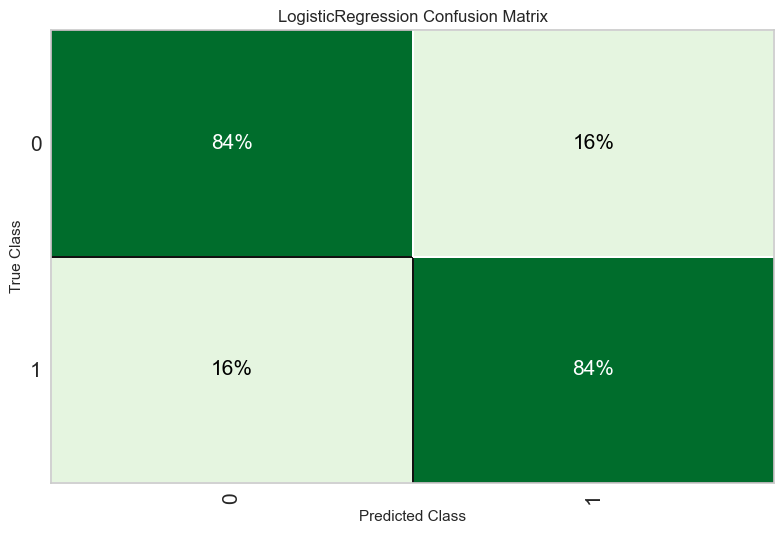

In [ ]:
lr = create_model('lr')
plot_model(lr, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
save_model(best_model, 'my_final_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['FLAG_PHONE',
                                              'HOUR_APPR_PROCESS_START_GROUP',
                                              'AMT_CREDIT_GROUP', 'YEARS_BIRTH',
                                              'AMT_INCOME_TOTAL_GROUP',
                                              'YEARS_REGISTRATION',
                                              'YEARS_ID_PUBLISH',
                                              'AMT_ANNUITY_GROUP',
                                              'REGION_POPULATION_RELATIVE_GROUP',
                                              'REGION_RATING_CLIENT',
                                              'YEARS_EMPLOYED',
                                              'OWN_...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                   

PROBAR MODELO SOLO CON VARIABLES MAYOR A 0,2

In [ ]:
df_resampled

In [144]:
variables_list_clean = [
    'NAME_EDUCATION_TYPE_Secondary / secondary special',
    'NAME_INCOME_TYPE_Working',
    'FLAG_PHONE',
    'CODE_GENDER_M',
    'HOUR_APPR_PROCESS_START_GROUP',
    'AMT_CREDIT_GROUP',
    'YEARS_BIRTH',
    'AMT_INCOME_TOTAL_GROUP',
    'YEARS_REGISTRATION',
    'ORGANIZATION_TYPE_Business Entity Type 3',
    'YEARS_ID_PUBLISH',
    'AMT_ANNUITY_GROUP',
    'OCCUPATION_TYPE_Laborers',
    'REGION_POPULATION_RELATIVE_GROUP',
    'ORGANIZATION_TYPE_Self-employed',
    'OCCUPATION_TYPE_MISSING',
    'OCCUPATION_TYPE_Sales staff',
    'REGION_RATING_CLIENT',
    'YEARS_EMPLOYED',
    'WALLSMATERIAL_MODE_MISSING',
    'WALLSMATERIAL_MODE_Panel',
    'WALLSMATERIAL_MODE_Stone, brick',
    'OWN_CAR_AGE_GROUP',
    'FLAG_DOCUMENT_3',
    'OCCUPATION_TYPE_Core staff',
    'FLAG_WORK_PHONE',
    'LIVINGAPARTMENTS_MODE',
    'NAME_INCOME_TYPE_State servant',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'TARGET'
]

In [145]:
data_final = df_resampled[variables_list_clean]

In [146]:
# Step 5: Use the resampled data in PyCaret for model training
clf = setup(data=data_final, target='TARGET', session_id=42)
best_model3 = compare_models()

# Step 6: Display the best model
print(best_model3)

,Description,Value
0,Session id,42
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(516504, 30)"
4,Transformed data shape,"(516504, 30)"
5,Transformed train set shape,"(361552, 30)"
6,Transformed test set shape,"(154952, 30)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9208,0.9665,0.9102,0.9300,0.9200,0.8417,0.8419,13.7970
rf,Random Forest Classifier,0.9179,0.9666,0.9129,0.9222,0.9175,0.8359,0.8359,13.3780
xgboost,Extreme Gradient Boosting,0.8533,0.9287,0.8308,0.8700,0.8499,0.7066,0.7074,1.3920
dt,Decision Tree Classifier,0.8475,0.8475,0.8781,0.8275,0.8520,0.6950,0.6963,1.0490
lightgbm,Light Gradient Boosting Machine,0.8437,0.9209,0.8131,0.8661,0.8387,0.6874,0.6887,1.9110
knn,K Neighbors Classifier,0.8416,0.9528,0.9949,0.7615,0.8627,0.6833,0.7178,12.8040
gbc,Gradient Boosting Classifier,0.8282,0.9078,0.8137,0.8380,0.8256,0.6564,0.6566,21.5940
ada,Ada Boost Classifier,0.8142,0.8978,0.8329,0.8029,0.8176,0.6285,0.6289,4.6110
ridge,Ridge Classifier,0.8139,0.8952,0.8110,0.8157,0.8133,0.6278,0.6278,0.2100
lda,Linear Discriminant Analysis,0.8139,0.8952,0.8109,0.8157,0.8133,0.6278,0.6278,0.4630


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


In [147]:
evaluate_model(best_model3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
numerical_columns= []
categorical_columns=[]
binary_columns=[]


for column_name, dtype in data_to_study.dtypes.items():

    if data_to_study[column_name].nunique() == 2 and set(unique_values) == {0, 1}:
        binary_columns.append(column_name)

    elif dtype == 'object':
        categorical_columns.append(column_name)

    elif dtype in ['float64', 'int64']:
        numerical_columns.append(column_name)

# Imprimir resultados
print("Variables binarias:", binary_columns)
print("Variables categóricas:", categorical_columns)
print("Variables continuas:", numerical_columns)

Variables binarias: []
Variables categóricas: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Variables continuas: ['TARGET', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'LIVINGAPARTMENTS_MODE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'AMT_REQ_CREDIT_BUREAU_DAY', 'YEARS_BIRTH', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_EMPLOYED', 'AMT_INCOME_TOTAL_GROUP', 'AMT_CREDIT_GROUP', 'AMT_ANNUITY_GROUP', 'REGION_POPULATION_RELATIVE_GROUP', 'OWN_CAR_AGE_GROUP', 'HOUR_APPR_PROCESS_START_GROUP']


In [ ]:
numerical_columns.remove('TARGET')

In [ ]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


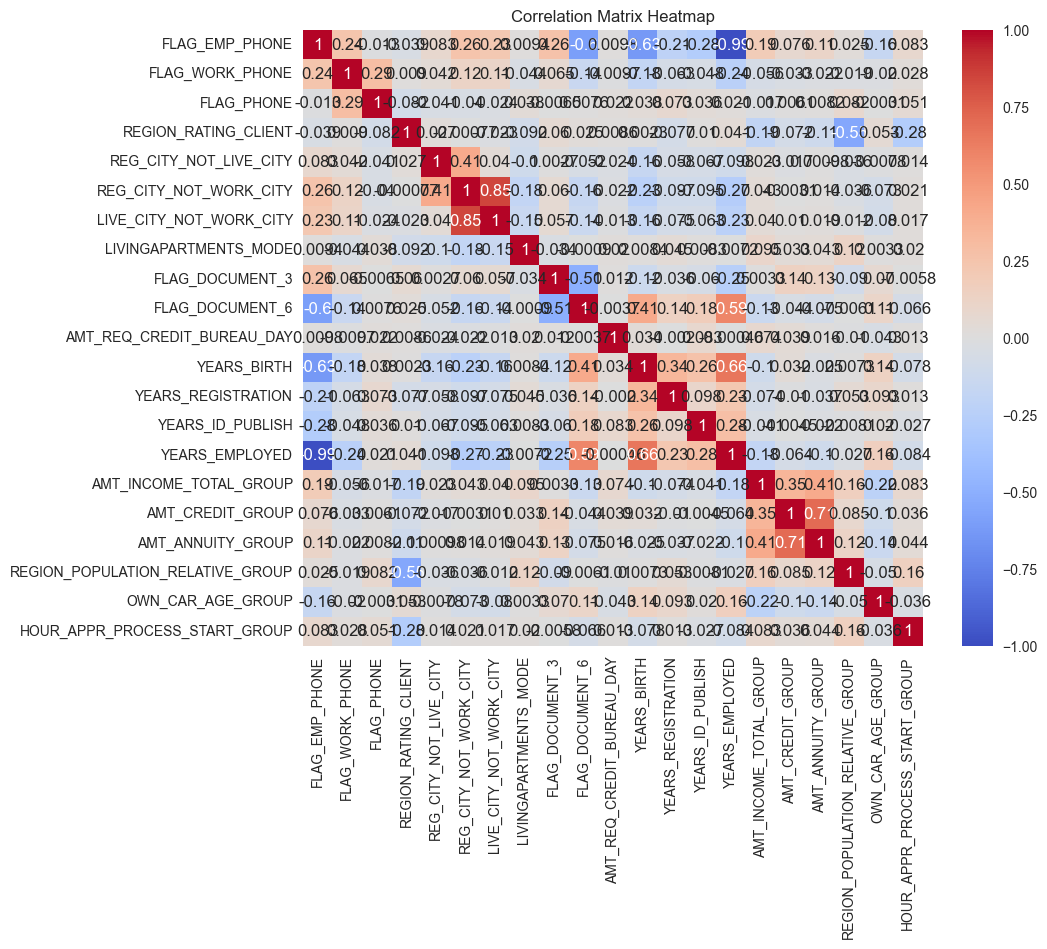

In [ ]:


correlation_matrix = data_to_study[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
if 'AMT_GOODS_PRICE' in data_to_study.columns:
    data_to_study = data_to_study.drop('AMT_GOODS_PRICE', axis=1)
    if 'AMT_GOODS_PRICE' in numerical_columns:
        numerical_columns.remove('AMT_GOODS_PRICE')

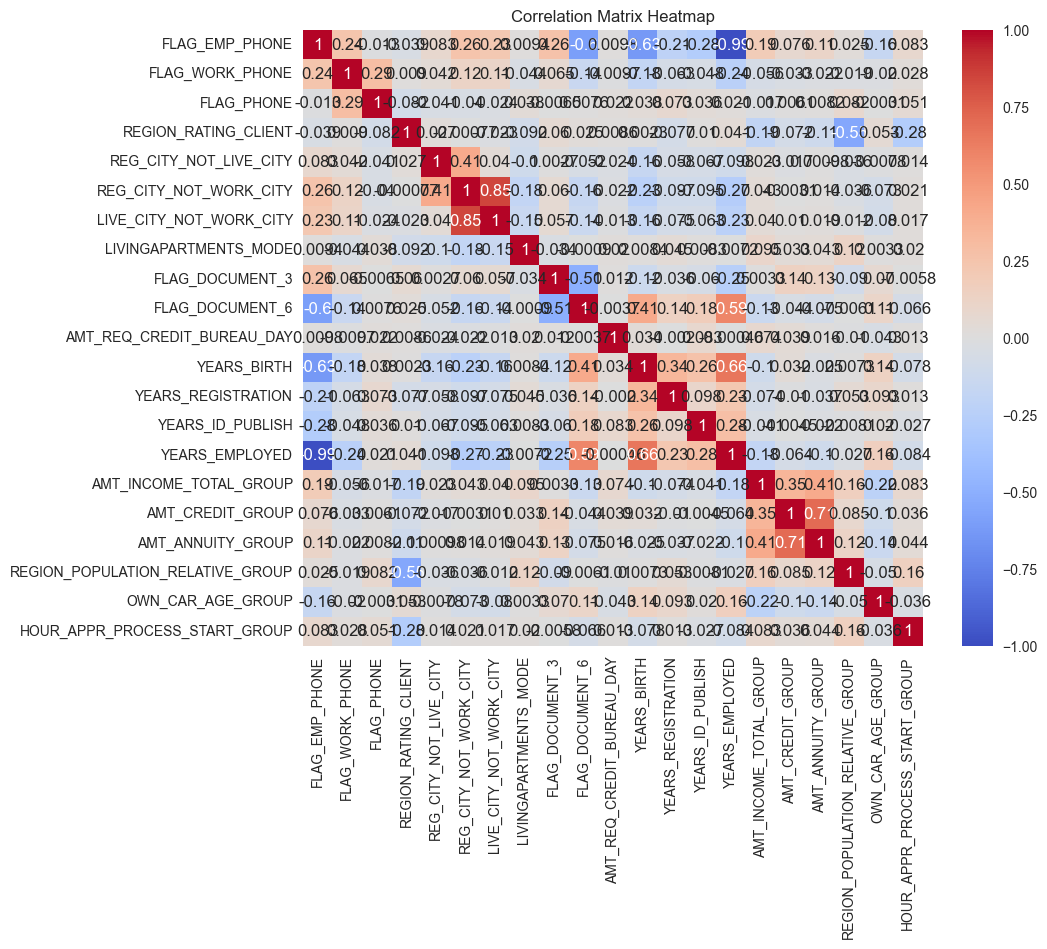

In [ ]:
correlation_matrix = data_to_study[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()